In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy 

In [ ]:
%pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Cleaning

In [ ]:
#load data into DataFrame
df=pd.read_csv(r"mentalhealth.csv")

# delete rows with zero 
df=df.dropna()


In [ ]:
#check data types
df.dtypes

In [ ]:
# check info
print(df.info())

In [ ]:
# check the columns
print(df.columns)

In [ ]:
# change the headers to lowercase
df.columns = [col.lower() for col in df.columns]
df

In [ ]:
# stats summary of days indoors column: other column are categorical values so I will change them into numerical values for analysis later.
print(df.describe())

In [ ]:
# check missing data
missing_values = df.isnull().sum()
print(missing_values) 

> Remove the duplicated data and coping struggles column.

In [ ]:
# check duplicate data 
duplicate_rows = df[df.duplicated()]

In [ ]:
print(f"Number of fully duplicated rows: {df.duplicated().sum()}")

In [ ]:
df = df.drop_duplicates()

In [ ]:
# drop the coping struggles column
df = df.drop(columns=['coping_struggles'])
print(df.columns)

### Data Analysis

> Label Encoder Module from Scikit-learn was imported to process the data.

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['gender_encoded']= le.fit_transform(df['gender'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

In [ ]:
# pie chart for Gender Distribution
explode = (0.03, 0.03, 0.03)
series = df2["gender_encoded"].value_counts()
series.plot(kind='pie', autopct = '%1.00f%%')
plt.title('Gender Distribution')
plt.legend(loc='best')
plt.show()

According to this pie-chart, we can see most participants are male. 

In [ ]:
# df2['occupation_encoded']= le.fit_transform(df2['Occupation'])
# print(dict(zip(le.classes_, le.transform(le.classes_)))) 

In [ ]:
# pie chart for Occupation Distribution
explode = (0.03, 0.03, 0.03)
series = df["occupation"].value_counts()
series.plot(kind='pie', autopct = '%1.00f%%')
plt.title('Occupation Distribution')
plt.legend(loc='best')
plt.show()

In [ ]:
# Chart of respondants with Family History
series = df["family_history"].value_counts()
series.plot(kind='bar', width = 0.3)
plt.title('Family History')
plt.ylabel('# of Responses')
plt.legend(loc='best')
plt.show()

**I want to expore the data and find some insights.** 

Therefore, I want to check - 
1) What is the prevlance of stress and gender?
2) Which occupations have the highest stress rates?

#### ***1) What is the prevalance of stress and gender?***

The __[formula](https://www.ncbi.nlm.nih.gov/books/NBK430867/)__ I used here is *Prevalence = (Total number with condition) / (Population at risk for the condition)*

In [ ]:
df['stress_encoded']= le.fit_transform(df['growing_stress'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

In [ ]:
total_male = len(df[df['gender_encoded']==0])
total_female = len(df[df['gender_encoded']==1])

total_male_with_condition = len(df[(df['gender_encoded']==0) & (df['stress_encoded'].isin([0,2]))])
total_female_with_condition = len(df[(df['gender_encoded']==0) & (df['stress_encoded'].isin([0,2]))])

prevalence_male = total_male_with_condition/total_male
prevalence_female = total_female_with_condition/total_female

In [ ]:
print(f"Prevalence of stress among males: {prevalence_male:.2%}")
print(f"Prevalence of stress among females: {prevalence_female:.2%}")

#### ***2) Which occupations have the highest stress rates?*** 

In [ ]:
print(df['occupation'].unique())

In [ ]:
df['occupation_encoded']=le.fit_transform(df['occupation'])
print(dict(zip(le.classes_,le.transform(le.classes_))))

This was calculated by grouping the data by Occupation, 
<br> counting how many people in each role answered "yes" to growing_stress, 
<br> and dividing that by the total number of people in that occupation. 
<br>The result is a percentage that reflects how prevalent stress is within each job category.

In [ ]:
total_business_persons = len(df['occupation_encoded']==0)
total_corporate_persons=len(df['occupation_encoded']==1) 
total_housewife_persons=len(df['occupation_encoded']==2)
total_other_persons=len(df['occupation_encoded']==3) 
total_student_persons=len(df['occupation_encoded']==4) 

In [ ]:
business_persons=len(df[(df['occupation_encoded']==0) & (df['stress_encoded'].isin([2]))])
corporate_persons=len(df[(df['occupation_encoded']==1) & (df['stress_encoded'].isin([2]))])
housewife_persons=len(df[(df['occupation_encoded']==2) & (df['stress_encoded'].isin([2]))])
other_persons=len(df[(df['occupation_encoded']==3) & (df['stress_encoded'].isin([2]))])
student_persons=len(df[(df['occupation_encoded']==4) & (df['stress_encoded'].isin([2]))])

In [ ]:
business = business_persons/total_business_persons
corporate = corporate_persons/total_corporate_persons
housewife = housewife_persons/total_housewife_persons
other = other_persons/total_other_persons
student = student_persons/total_student_persons

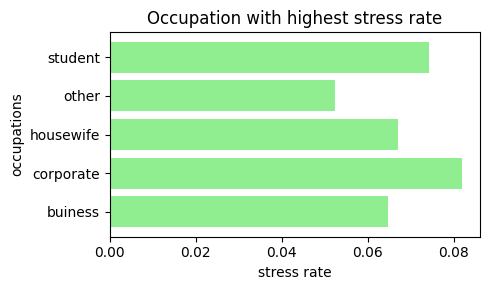

NameError: name 'savefig' is not defined

<Figure size 640x480 with 0 Axes>

In [148]:
# plot:
x=["buiness","corporate","housewife","other","student"]
#values against each values of y
y=[business,corporate,housewife,other,student]

fig = plt.figure()
fig.set_figwidth(5) 
fig.set_figheight(3) 

plt.barh(x, y, color='lightgreen')
plt.xlabel("stress rate")
plt.ylabel("occupations")
plt.title("Occupation with highest stress rate")
plt.tight_layout()
plt.show()
plt.savefig('occupations_stress', bbox_inches='tight')

In [ ]:
print(df['country'].unique())

In [ ]:
# country and care options


plt.show()

In [ ]:
# days indoors and growing stress 